In [1]:
# Basic imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import warnings, os
import numpy as np
import pandas as pd
import sys
from ipywidgets import interact, interactive, fixed, interact_manual, SelectMultiple, Layout, RadioButtons, Checkbox, HBox, VBox, Box, IntSlider, Select
warnings.filterwarnings('ignore')
os.chdir('D:/Anaconda3/projects/Housing_demo/')
sys.path.append('03_PyScripts/')

In [4]:
data_path = '01_Data/bank_mkt.csv'
full_data_path = '01_Data/bank_mkt.csv'

In [5]:
data = pd.read_csv(data_path)

# MOB model

In [32]:
from imp import reload
import model_utils, plotly_viz;reload(model_utils);reload(plotly_viz);

In [33]:
model = model_utils.MOB(data_path, full_data_path,id_key='ID', depth=5, min_size=200, trn_split=.8, ver_string='10_25_A_FIRST')
model.show_formula()

target ~ balance + age + campaign + pdays + previous + calls + emails + coupons | job + marital + education + default + housing + loan + contact + month + poutcome + day + age


In [35]:
model.mob_fit()

[1] "R2 - Train: 0.469 Test: 0.405"



*******************
TREE
*******************


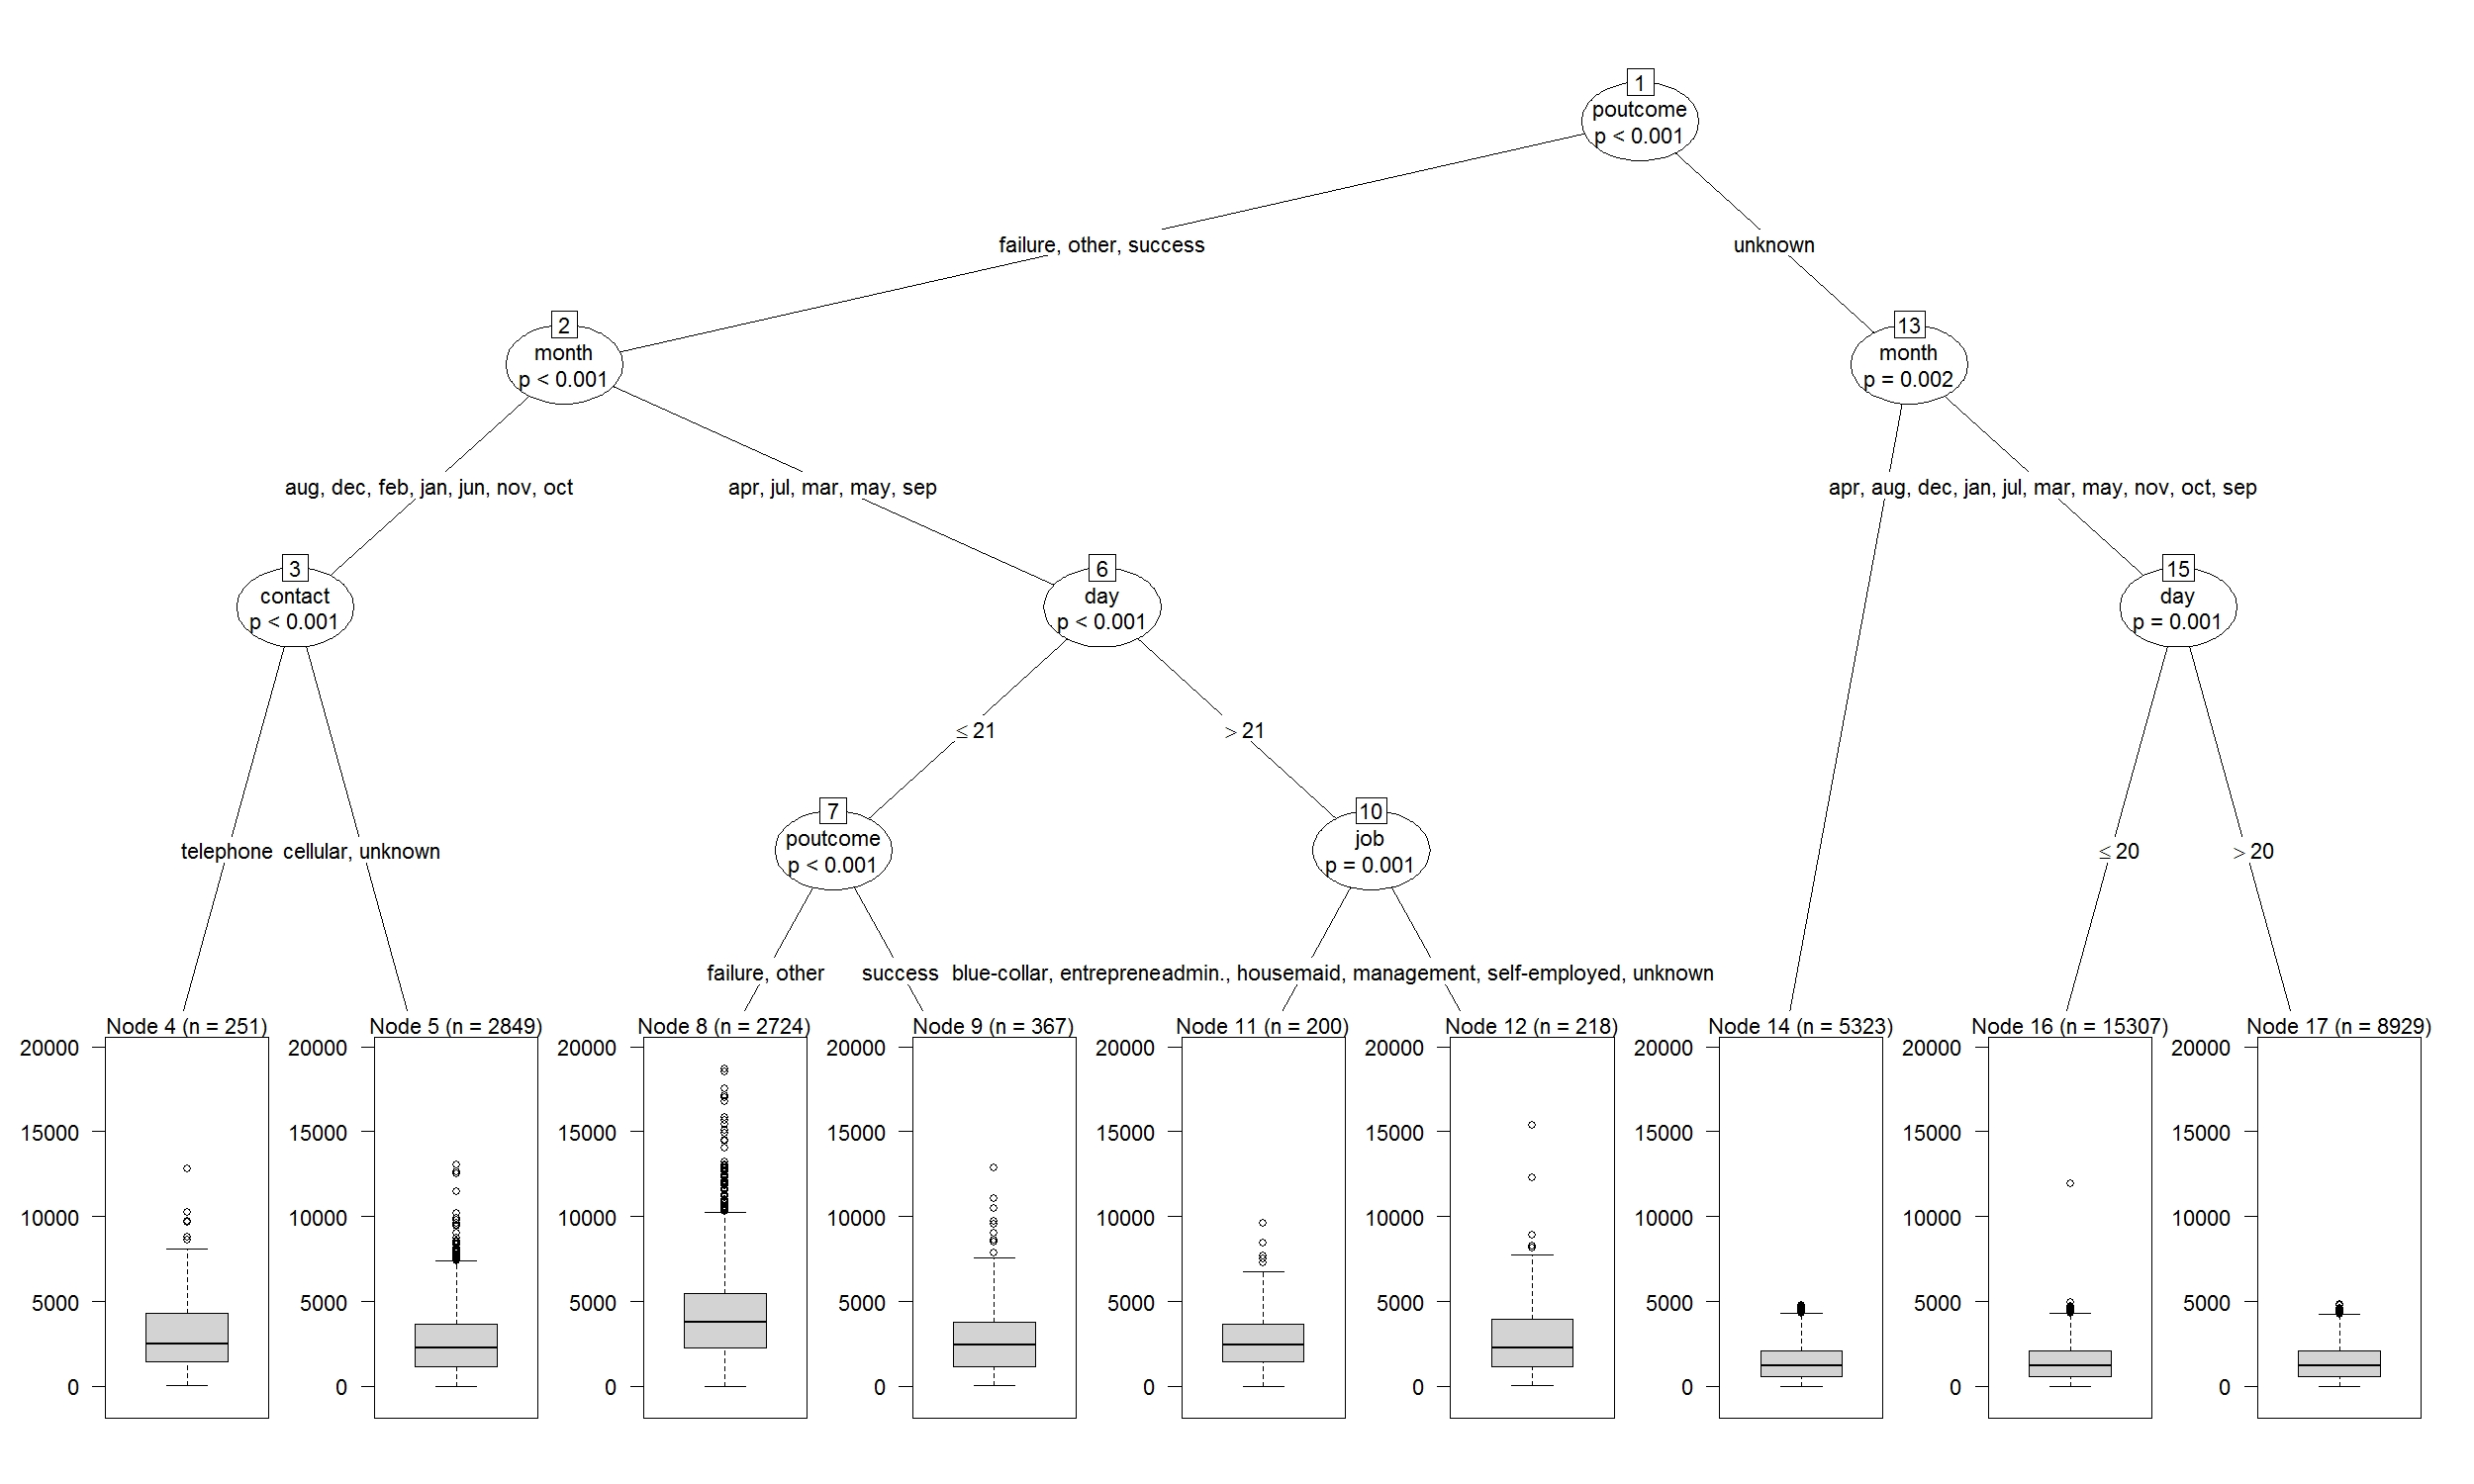


-----------------------------------------------------------------------------------------------------------------------------

*******************
Summary on all quaters
*******************

-----------------------------------------------------------------------------------------------------------------------------

*******************
Impact over all quaters
*******************
******************* Overall Impact *********************


Impact_(Intercept)    0.029412
Impact_balance       -0.006216
Impact_age            0.020653
Impact_campaign       0.365740
Impact_pdays          0.525294
Impact_previous      -0.022934
Impact_calls         -0.043546
Impact_emails         0.099297
Impact_coupons        0.032300
dtype: float64


******************* Segment Level Impact ***********************


,0,1,2,3,4,5,6,7,8
nodes,4.000000,5.000000,8.000000,9.000000,11.000000,12.000000,14.0,16.000000,17.0
Impact_(Intercept),-0.460363,-0.018337,-0.429135,-0.225635,-0.125047,0.504726,NaN,0.959674,NaN
Impact_balance,-0.016307,0.005713,0.001984,0.007159,-0.022090,-0.015251,NaN,-0.004720,NaN
Impact_age,0.305536,-0.057285,0.039230,0.005082,0.227971,-0.351764,NaN,-0.024199,NaN
Impact_campaign,0.411435,0.391908,0.565535,0.436231,0.382350,0.380248,NaN,-0.007526,NaN
Impact_pdays,0.669570,0.576061,0.741789,0.653205,0.420618,0.633555,NaN,-0.017740,NaN
Impact_previous,0.023426,-0.006938,-0.012649,-0.055676,-0.066063,-0.042402,NaN,-0.000236,NaN
Impact_calls,-0.094853,-0.014267,0.005990,-0.006859,-0.119177,-0.093032,NaN,0.017377,NaN
Impact_emails,0.123363,0.131271,0.109251,0.049487,0.186883,0.019666,NaN,0.075157,NaN
Impact_coupons,0.038193,-0.008126,-0.021994,0.137006,0.114555,-0.035746,NaN,0.002215,NaN


In [36]:
model.create_summary()

#### Effectiveness VS Exposure

In [43]:
#code
ver = model
ver.seg_lvl_data['Size'] = pd.cut(ver.seg_lvl_data['target'], 4, labels=[28,31,34,37])
# Code
def choose_variable(X_var, Y_var, pivot_on=None, color_on=None, size_on=None):
    plotly_viz.exp_vs_eff(ver.seg_lvl_data, X_var, Y_var, pivot_on, color_on, size_on)
var = interact(choose_variable, X_var=ver.beta, Y_var=ver.var_mean, pivot_on=['nodes'], color_on=['age'], size_on=['Size']);